In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from pathlib import Path

import scipy
from scipy import signal

import tensorflow as tf
from tensorflow.keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential

In [2]:
# pip install mpld3

In [3]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [4]:
a = pd.read_table(r'C:\Users\DELL\Desktop\Isens_backyard testing\Sensor_parallel to trench\22_Nov\Sensorplace at edge of trench\Subject_Anuj\Walk\lvm\15-20-36.lvm',header=None)
a = a.drop([0,2,5,6,7,8],axis=1)
da = signal.detrend(a)

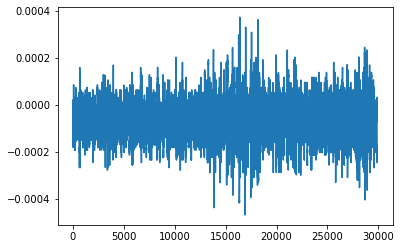

In [5]:
plt.figure()
plt.plot(da[:,1])

In [20]:
b = pd.read_table(r'C:\Users\DELL\Desktop\Isens_backyard testing\Sensor_parallel to trench\22_Nov\Sensorplace at edge of trench\Subject_Anuj\Jog\lvm\15-21-12.lvm',header=None)
b = b.drop([0,2,5,6,7,8],axis=1)
db = signal.detrend(b)
db /= 85.5
t1 = db[:,1]
# t1 = pd.DataFrame(t1)

In [25]:
l = []
th1 = 0.00001025
th2 = 0.00001025+0.00001025/2
for i in range(len(t1)):
    if t1[i]>th1 and t1[i]<th2:
        l.append(i)
print(l)

[7357, 7358, 7700, 7701, 7705, 8056, 8057, 8058, 8059, 8060, 8061, 8062, 8427, 8428, 8429, 8430, 8431, 9143, 9144, 9145, 9146, 9147, 9195, 9196, 9197, 9198, 9199, 9200, 9201, 9202, 9203, 9471, 9472, 9473, 9865, 9866, 9870, 10579, 10580, 15307, 15308, 15309, 15310, 15311, 15312, 15313, 15314, 15315]


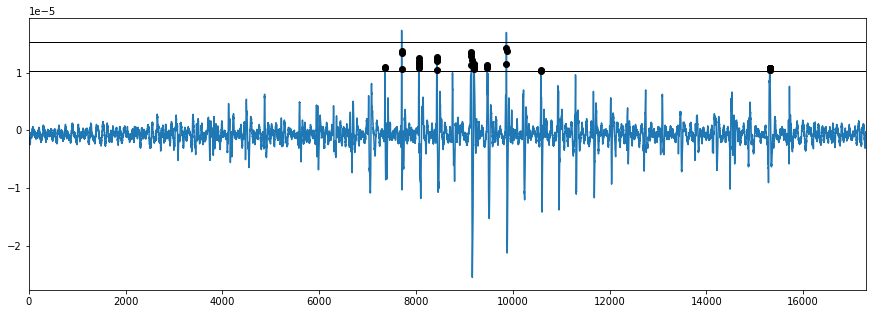

In [26]:
# X = np.linspace(0,18,10)
fig = plt.figure(figsize=(15, 5))
# ax = fig.add_subplot()

plt.plot(t1)
plt.margins(x=0)

# plt.tight_layout()
# ax.spines['bottom'].set_color('0.5')
# ax.spines['top'].set_color('0.5')
# ax.spines['right'].set_color('0.5')
# ax.spines['left'].set_color('0.5')
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 1

plt.axhline(y=th1, linewidth=1, color='k')
plt.axhline(y=th2, linewidth=1, color='k')
# for i in l:
plt.plot(l,t1[l],'ko')

In [9]:
X = np.linspace(0,18,10)
X

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [10]:
type(t1)
# np.shape(t1)

numpy.ndarray

In [11]:
lf = []
lf.append(l[0])
for i in range(len(l)-1):
    if l[i]+150 < l[i+1]:
        lf.append(l[i+1])
lf

[7357, 7700, 8056, 8427, 9143, 9471, 9865, 10579, 15307]

In [12]:
ts = np.array([t1[lf[0]-100:lf[0]+150]])
# t = pd.DataFrame(t1)
# ts = pd.DataFrame()
# ts = np.array()
for i in range(1,len(lf)):
#     row_n = ts.shape[0]
#     ts = np.insert(ts,row_n,t1[i-100:i+150],axis=0)
    # ts = pd.concat([ts, t[lf[i]-100:lf[i]+150]], ignore_index=True, axis=1)

    ts = np.vstack([ts, t1[lf[i]-100:lf[i]+150]])
    # break

In [13]:
ts
# np.shape(ts)

array([[-2.36647173e-06, -1.87524366e-06, -1.49864554e-06, ...,
        -1.12134975e-06, -1.12300639e-06, -1.50574515e-06],
       [ 6.24628811e-07, -1.33849006e-07,  1.28131930e-07, ...,
        -2.52701287e-07, -4.97729903e-07, -2.44904016e-07],
       [-3.71964678e-07, -5.03932865e-07,  1.71898635e-09, ...,
        -3.61078417e-06, -3.86195345e-06, -4.11702140e-06],
       ...,
       [-6.25375984e-07, -7.49546901e-07, -4.96721014e-07, ...,
        -2.45614035e-07, -6.23781676e-07, -4.95126706e-07],
       [-1.36979123e-06, -1.75048733e-06, -1.87835754e-06, ...,
        -8.62744405e-07, -9.87500741e-07, -9.87500741e-07],
       [ 3.83629630e-09, -2.49387992e-07, -4.75527269e-22, ...,
        -9.97340663e-07, -1.24685333e-06, -1.00123930e-06]])

In [14]:
np.shape(t1)

(17300,)

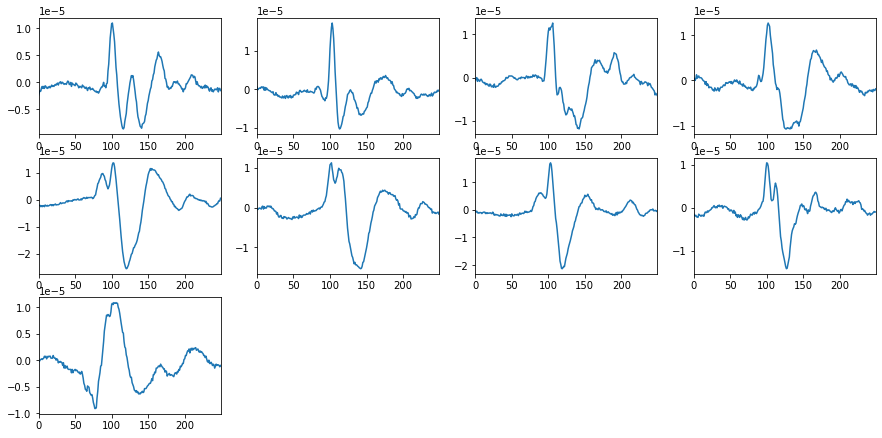

In [15]:
plt.figure(figsize=(15,15))
for i,t in enumerate(ts):
#     print(i)
#     print(x)
    ax = plt.subplot(6, 4, i + 1)
    ax.plot(t)
    plt.margins(x=0)
#     plt.tight_layout()
#     fig, axs = plt.subplots(5,5)
#     plt.plot(ts[i,:])
    

In [27]:
# for i in range(len(ts)):
#     plt.figure()
#     plt.plot(ts[i,:])

In [17]:
# fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

# axs = axs.ravel()

# for i in range(10):

#     axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
#     axs[i].set_title(str(250+i))

In [18]:
a = pd.read_table(r'C:\Users\DELL\Desktop\Isens_backyard testing\Sensor_parallel to trench\22_Nov\Sensorplace at edge of trench\Subject_Anuj\Jog\lvm\15-21-12.lvm',header=None)
a = a.drop([0,2,5,6,7,8],axis=1)
da = signal.detrend(a)
da /= 85.5

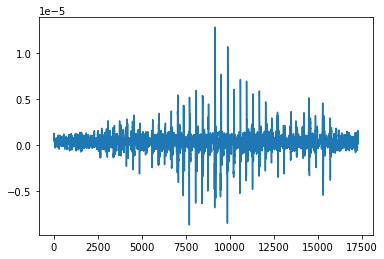

In [19]:
plt.figure()
plt.plot(da[:,0])